Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 3.9158
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 3.4545
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.9494
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.7737
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.7629
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.7595
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.7562
Epoch 8/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.7537
Epoch 9/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.7523
Epoch 10/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.7504
Epoch 11/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.7487
Epoch 12/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.7477
E

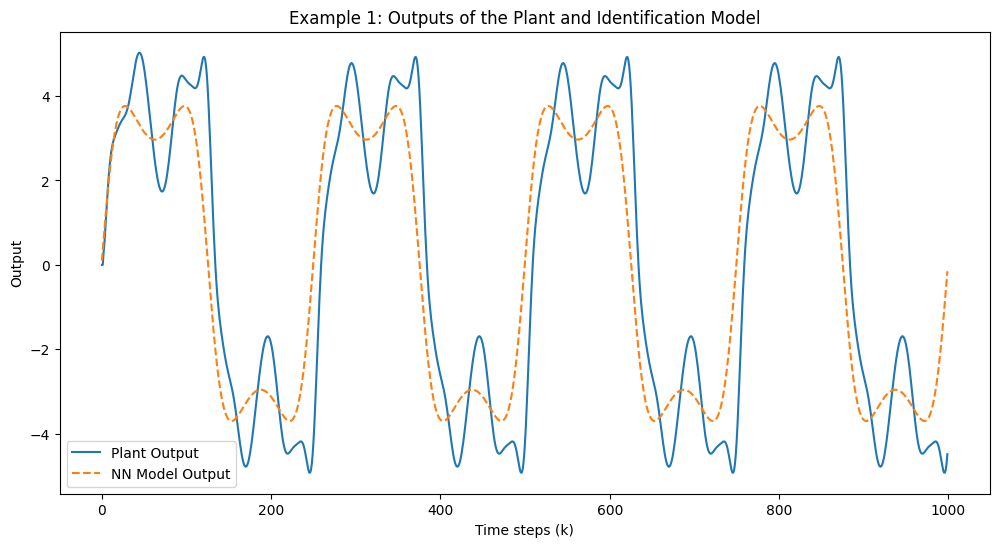

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Define the plant function for Example 1
def plant_function_1(k, yp, u):
    return 0.3 * yp[k - 1] + 0.6 * yp[k - 2] + 0.6 * np.sin(np.pi * u[k]) + 0.3 * np.sin(3 * np.pi * u[k]) + 0.1 * np.sin(5 * np.pi * u[k])

# Generate the input signal (sinusoid)
k = np.arange(50000)
u = np.sin(2 * np.pi * k / 250)

# Generate the plant output
yp = np.zeros_like(k, dtype=float)
for i in range(2, len(k)):
    yp[i] = plant_function_1(i, yp, u)

# Neural Network for Example 1
model_1 = Sequential([
    Dense(32, input_dim=1, activation='tanh'),
    Dense(1, activation='linear')
])

# Compile the model with Adam optimizer
model_1.compile(optimizer=Adam(lr=0.15), loss='mean_squared_error')

# Train the model
model_1.fit(u, yp, epochs=50, verbose=1)

# Predict the output using the trained model
yp_pred = model_1.predict(u)

# Plotting the results similar to Fig. 12
plt.figure(figsize=(12, 6))
plt.plot(k[:1000], yp[:1000], label='Plant Output')
plt.plot(k[:1000], yp_pred[:1000], label='NN Model Output', linestyle='dashed')
plt.title('Example 1: Outputs of the Plant and Identification Model')
plt.xlabel('Time steps (k)')
plt.ylabel('Output')
plt.legend()
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Generate the input signal (random input in the interval [-2, 2])
k = np.arange(100000)
u = np.random.uniform(-2, 2, size=len(k))

# Plant function definitions
def plant_f(yp):
    return yp / (1 + yp**2)

def plant_g(u):
    return u**3

# Generate the plant output
yp = np.zeros_like(u)
for i in range(1, len(u)):
    yp[i] = plant_f(yp[i - 1]) + plant_g(u[i - 1])

# Neural Networks for Example 3
model_f = Sequential([Dense(20, input_dim=1, activation='tanh'), Dense(1)])
model_g = Sequential([Dense(20, input_dim=1, activation='tanh'), Dense(1)])

# Compile the models
model_f.compile(optimizer=SGD(lr=0.1), loss='mean_squared_error')
model_g.compile(optimizer=SGD(lr=0.1), loss='mean_squared_error')

# Train the models
model_f.fit(yp[:-1], yp[1:], epochs=10, batch_size=32, verbose=1)
model_g.fit(u[:-1], yp[1:], epochs=10, batch_size=32, verbose=1)

# Validate the model with the specified input
u_val = np.sin(2 * np.pi * k / 25) + np.sin(2 * np.pi * k / 10)
yp_val = np.zeros_like(u_val)
for i in range(1, len(u_val)):
    yp_val[i] = plant_f(yp_val[i - 1]) + plant_g(u_val[i - 1])

# Predict the output using the trained models
yp_pred_f = model_f.predict(yp_val[:-1]).flatten()
yp_pred_g = model_g.predict(u_val[:-1]).flatten()

# Combine the predictions
yp_pred_combined = yp_pred_f + yp_pred_g




Epoch 1/10
3125/3125 [==============================] - 17s 5ms/step - loss: 9.2107
Epoch 2/10
3125/3125 [==============================] - 6s 2ms/step - loss: 9.1963
Epoch 3/10
3125/3125 [==============================] - 7s 2ms/step - loss: 9.1964
Epoch 4/10
3125/3125 [==============================] - 6s 2ms/step - loss: 9.1937
Epoch 5/10
3125/3125 [==============================] - 6s 2ms/step - loss: 9.1910
Epoch 6/10
3125/3125 [==============================] - 7s 2ms/step - loss: 9.1926
Epoch 7/10
3125/3125 [==============================] - 7s 2ms/step - loss: 9.1888
Epoch 8/10
3125/3125 [==============================] - 7s 2ms/step - loss: 9.1910
Epoch 9/10
3125/3125 [==============================] - 7s 2ms/step - loss: 9.1882
Epoch 10/10
3125/3125 [==============================] - 8s 3ms/step - loss: 9.1902
Epoch 1/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.7163
Epoch 2/10
3125/3125 [==============================] - 7s 2ms/step - loss: 1.6477
Ep

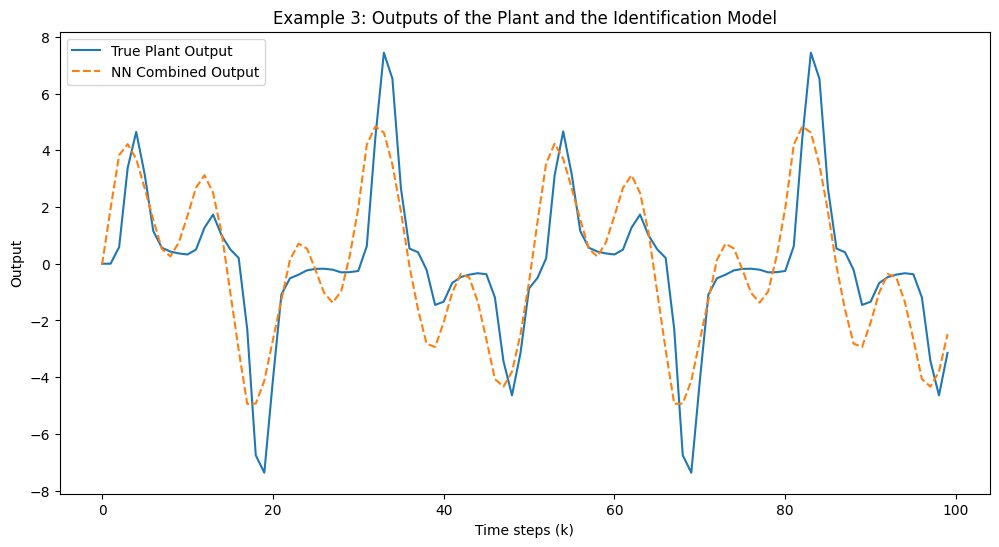

In [6]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(k[:100], yp_val[:100], label='True Plant Output')
plt.plot(k[:100], yp_pred_combined[:100], label='NN Combined Output', linestyle='dashed')
plt.title('Example 3: Outputs of the Plant and the Identification Model')
plt.xlabel('Time steps (k)')
plt.ylabel('Output')
plt.legend()
plt.show()